In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('/content/Book1.csv')
X = data[['Input']].values
y = data[['Output']].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [5]:
scaler = MinMaxScaler()

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [7]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(1,2)
        self.fc2 = nn.Linear(2,5)
        self.fc3 = nn.Linear(5,2)
        self.fc4 = nn.Linear(2,1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.relu(self.fc3(x))
    x = self.fc4(x)

    return x

In [8]:
ai_world = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_world.parameters(),lr=0.001)


def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(ai_world(X_train), y_train)
        loss.backward()
        optimizer.step()

        ai_world.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [15]:
train_model(ai_world, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 631.424561
Epoch [200/2000], Loss: 400.639679
Epoch [400/2000], Loss: 210.059052
Epoch [600/2000], Loss: 77.514275
Epoch [800/2000], Loss: 12.947611
Epoch [1000/2000], Loss: 0.216089
Epoch [1200/2000], Loss: 0.008908
Epoch [1400/2000], Loss: 0.011189
Epoch [1600/2000], Loss: 0.013963
Epoch [1800/2000], Loss: 0.013822


In [16]:
with torch.no_grad():
    test_loss = criterion(ai_world(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 0.017410


In [17]:
loss_df = pd.DataFrame(ai_world.history)

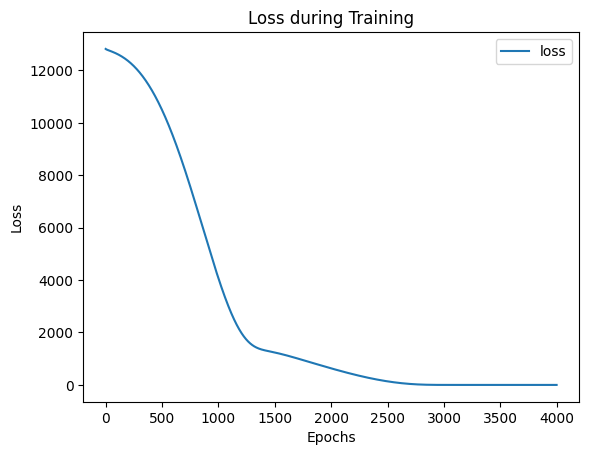

In [18]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [22]:
X_n1_1 = torch.tensor([[8]], dtype=torch.float32)
prediction = ai_world(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 80.09501647949219


In [21]:
X_n1_1 = torch.tensor([[5]], dtype=torch.float32)
prediction = ai_world(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 50.07160568237305
